In [58]:
from keras.models import Sequential, load_model
from keras.layers import LSTM, Conv2D
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.layers import Dense, Input, Activation
from keras.datasets import imdb

from matplotlib import pyplot as plt
%matplotlib inline

import numpy

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4249710321276480863
, name: "/gpu:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 16305959988761348502
physical_device_desc: "device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:01:00.0"
]


In [3]:
left_stay_train = numpy.load('train/leftStay2.npy')
right_stay_train = numpy.load('train/rightStay2.npy')

Y_train = []
for i in range(100):
    Y_train.append([1, 0])
for i in range(100):
    Y_train.append([0, 1])

X_train = numpy.concatenate((left_stay_train, right_stay_train))

In [69]:
left_stay_test = numpy.load('test/testLeftStay.npy')
right_stay_test = numpy.load('test/testRightStay.npy')

Y_test = []
for i in range(15):
    Y_test.append([1, 0])
for i in range(15):
    Y_test.append([0, 1])

X_test = numpy.concatenate((left_stay_test, right_stay_test))

In [70]:
numpy.shape(X_train)

(200, 200, 6)

In [72]:
# create the model
model = Sequential([LSTM(48, input_shape=(200,6)), Dense(2), Activation('softmax')])

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5, batch_size=30, shuffle=True)
# Final evaluation of the model
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Overfit Accuracy: %.2f%%" % (scores[1]*100))
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 48)                10560     
_________________________________________________________________
dense_40 (Dense)             (None, 2)                 98        
_________________________________________________________________
activation_15 (Activation)   (None, 2)                 0         
Total params: 10,658
Trainable params: 10,658
Non-trainable params: 0
_________________________________________________________________
None
Train on 200 samples, validate on 30 samples
Epoch 1/5
200/200 [==============================] - 3s - loss: 0.6987 - acc: 0.4800 - val_loss: 0.6948 - val_acc: 0.5000
Epoch 2/5
200/200 [==============================] - 1s - loss: 0.6900 - acc: 0.5650 - val_loss: 0.6885 - val_acc: 0.8000
Epoch 3/5
200/200 [==============================] - 1s - loss: 0.6877 - acc: 0.5400 - val_loss: 0.6854 - va

In [163]:
# Final evaluation of the model
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.00%


In [18]:
model.save('testLeftRight.h5')

In [26]:
# create the model
model2 = load_model('testLeftRight.h5')
model2.predict(X_train[0])

ValueError: Error when checking : expected lstm_16_input to have 3 dimensions, but got array with shape (200, 6)

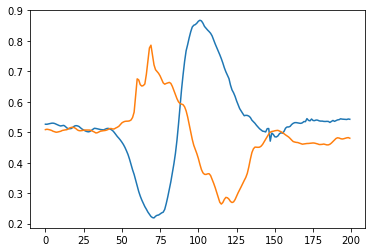

In [200]:
plt.plot(right_stay_test[0].T[0])
plt.plot(left_stay_test[0].T[0])

In [187]:
left_back_test[0].T[0]

array([  4.83779660e-01,   4.84817273e-01,   4.86633097e-01,
         4.88708324e-01,   4.92233158e-01,   4.93789578e-01,
         4.93102922e-01,   4.91714351e-01,   4.87014572e-01,
         4.81429770e-01,   4.78683146e-01,   4.78881514e-01,
         4.82055390e-01,   4.84756237e-01,   4.86007477e-01,
         4.85595483e-01,   4.85656519e-01,   4.86266880e-01,
         4.85931182e-01,   4.86984054e-01,   4.88998245e-01,
         4.91134508e-01,   4.92080568e-01,   4.90417334e-01,
         4.87685969e-01,   4.85076677e-01,   4.85122454e-01,
         4.87579156e-01,   4.89410239e-01,   4.89913787e-01,
         4.89669642e-01,   4.88418402e-01,   4.85961700e-01,
         4.80346380e-01,   4.76958877e-01,   4.77401389e-01,
         4.81521324e-01,   4.86953536e-01,   4.91042954e-01,
         4.91073472e-01,   4.88830396e-01,   4.87045090e-01,
         4.86358434e-01,   4.85809110e-01,   4.85458152e-01,
         4.87045090e-01,   4.88281071e-01,   4.88494697e-01,
         4.85778592e-01,